# Multiple Linear Regression

TV, Radyo ve Gazete ilanlarına göre satış rakamları var.
Buradan Sales Sütunu hedef yani y=df['Sales']. TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap arayacaksınız ve Hangi reklam yönteminin daha başarılı olduğunu bulacaksınız. Test olarak ayırdığınız veri ile tahmin ettiğiniz veriyi aynı grafikte line chart ile görselleştireceksiniz.

<a href='https://classroom.google.com/c/Njg5OTA2MTk5MjEy/a/Njg5OTA2Mzk1OTcy/details'> Dataya Buradan Ulaşabilirsiniz</a>

#### Gerekli paketleri import ediyoruz

In [5]:
import pandas as pd  #Data dosyalarını okuma paketi
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np

In [6]:
import warnings
warnings.filterwarnings("ignore")

#### Import Data

In [8]:
df=pd.read_csv("advertising.csv")

#### EDA - Exploratory Data Anlysis

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.shape

(200, 4)

In [14]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [15]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='Newspaper'>

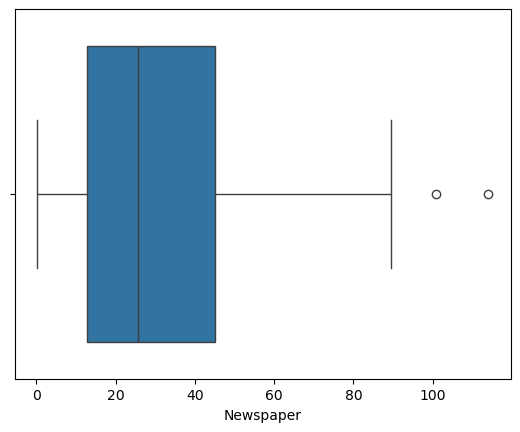

In [16]:
sns.boxplot(x=df["Newspaper"])

<Axes: xlabel='TV'>

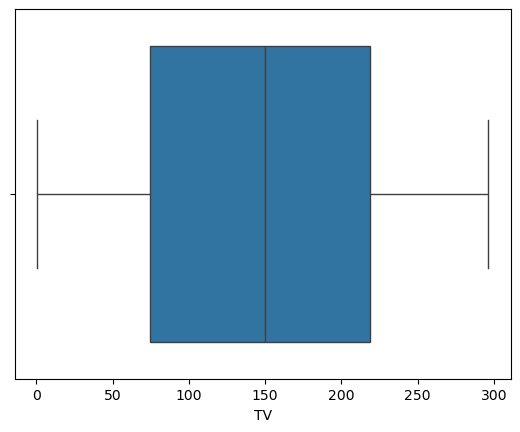

In [17]:
sns.boxplot(x=df["TV"])

<Axes: xlabel='Radio'>

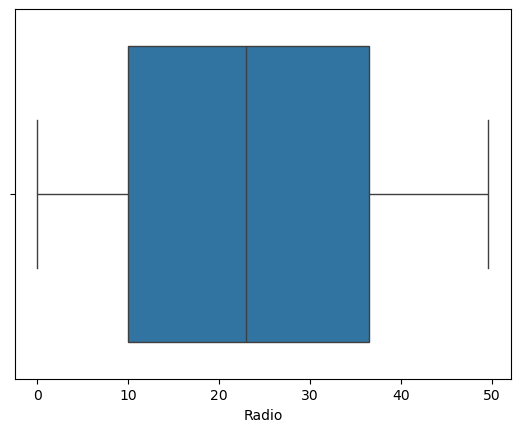

In [18]:
sns.boxplot(x=df["Radio"])

<Axes: >

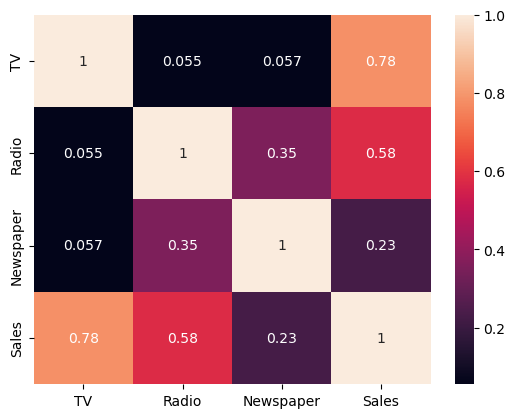

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [20]:
abs(df.corr(numeric_only=True)["Sales"]).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

#### Feature Engineering

In [22]:
x=df.drop("Sales",axis=1)
y=df["Sales"]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [24]:
outliers=df.quantile(q=.97, numeric_only=True)

In [25]:
df=df[df["Newspaper"]<outliers["Newspaper"]]

#### Modelling

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
lrtahmin=lr.predict(x_test)

In [30]:
r2_score(y_test,lrtahmin)

0.899438024100912

In [31]:
mean_squared_error(y_test,lrtahmin)**.5

1.7815996615334502

In [32]:
R=Ridge()

In [33]:
R.fit(x_train,y_train)

Ridge()

In [34]:
Rtahmin=R.predict(x_test)

In [35]:
r2_score(y_test,Rtahmin)

0.89943810463304

In [36]:
mean_squared_error(y_test,Rtahmin)**.5

1.7815989481622212

In [37]:
L=Lasso()

In [38]:
L.fit(x_train,y_train)

Lasso()

In [39]:
Ltahmin=L.predict(x_test)

In [40]:
r2_score(y_test,Rtahmin)

0.89943810463304

In [41]:
mean_squared_error(y_test,Rtahmin)**.5

1.7815989481622212

In [42]:
EN=ElasticNet()

In [43]:
EN.fit(x_train,y_train)

ElasticNet()

In [44]:
ENtahmin=EN.predict(x_test)

In [45]:
r2_score(y_test,ENtahmin)

0.8999611908219934

In [46]:
mean_squared_error(y_test,ENtahmin)**.5

1.7769592938861511

In [47]:
y_test=pd.array(y_test)

In [48]:
y_test

<NumpyExtensionArray>
[16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,  8.7, 11.9,
  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5, 10.9, 22.2,  9.3,  8.1,
 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,  8.7, 16.1, 20.7, 11.6, 20.8, 11.9,
  6.9]
Length: 40, dtype: float64

In [49]:
lrtahmin

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [51]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,9.834490e-01,7.227785e-01,6.178356e-01
XGBRegressor,9.724704e-01,9.321655e-01,7.258288e-01
KNeighborsRegressor,9.580404e-01,1.150824e+00,9.740657e-01
Decision Tree,9.493879e-01,1.263922e+00,8.900000e-01
Extra Tree,9.309568e-01,1.476228e+00,1.072500e+00
AdaBoost,9.106204e-01,1.679625e+00,1.189000e+00
Lasso,9.004013e-01,1.773046e+00,1.452202e+00
ElasticNet,8.999612e-01,1.776959e+00,1.456659e+00
Ridge,8.994381e-01,1.781599e+00,1.460766e+00
Linear,8.994380e-01,1.781600e+00,1.460757e+00


In [52]:
GBR=GradientBoostingRegressor()

In [53]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [54]:
tahmin0=GBR.predict(x_test)

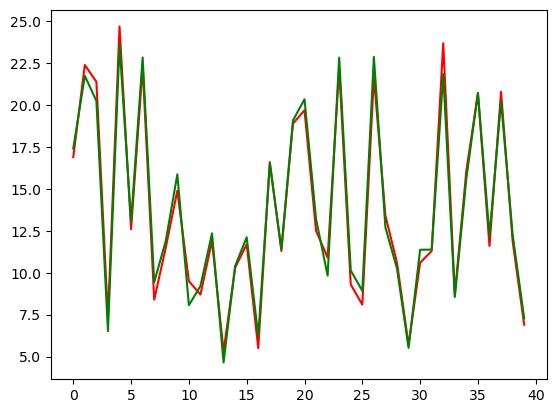

In [55]:
plt.figure()
plt.plot(y_test, color="r")
plt.plot(tahmin0 ,color="g")

In [56]:
feature_importance = pd.DataFrame({"Feature":x_train.columns,"Coefs":lr.coef_[0]})

In [57]:
feature_importance=feature_importance.sort_values(by="Coefs",ascending=False)

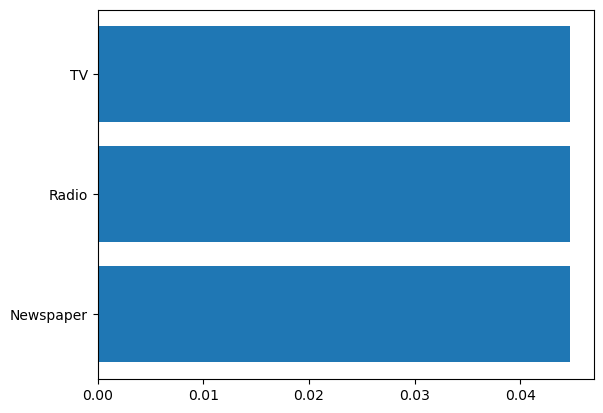

In [58]:
plt.figure()
plt.barh(feature_importance["Feature"],feature_importance["Coefs"])
plt.gca().invert_yaxis() 

In [59]:
residuals0=y_test-tahmin0

In [60]:
residuals0

<NumpyExtensionArray>
[  -0.5193688032637311,    0.6467602346582915,    1.1422930124568076,
    0.7843278643080769,    1.0801327508503142,   -0.4485321412390153,
   -0.5525046149132642,   -1.0352033274405041,   -0.4005848209436227,
    -0.973053623876023,    1.4350932331741628,   -0.5133311264706624,
  -0.44988291688122395,    0.6538762500388797,  -0.10360207044178438,
   -0.4196208776828527,   -0.7259947422510127,   0.07940021660115804,
  -0.12311668841981316,  -0.18584766315176893,   -0.6590502371447648,
    -0.700241098337294,    1.0656379144893755,   -0.6412901412420418,
    -0.836192079084439,   -0.8244504169418363,   -1.1842350075443129,
    0.7014007073805804,    0.3467512906618033,    0.1812459454670874,
   -0.7745662006332861,  -0.08200583709338893,    1.8430465917543906,
   0.14775195583615464,       0.4754508730003, -0.038195675816623975,
   -0.6116193912747043,    0.5611583271185303,  -0.39420265776673347,
   -0.3748481288392398]
Length: 40, dtype: float64

<Axes: ylabel='Count'>

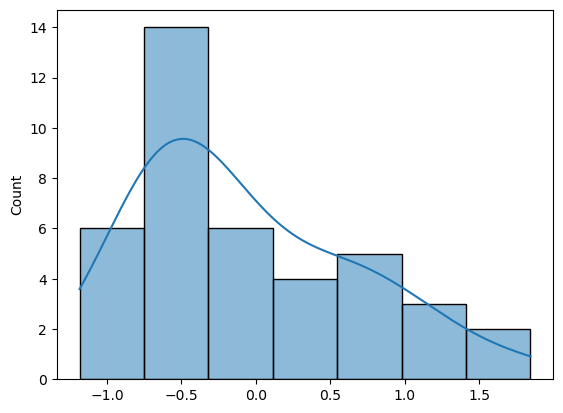

In [61]:
sns.histplot(residuals0,kde=True)

<Axes: ylabel='Density'>

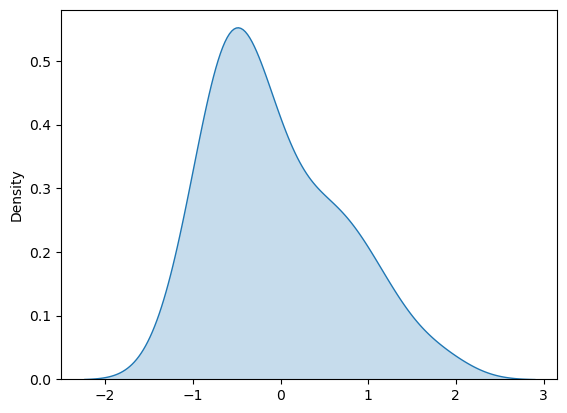

In [62]:
sns.kdeplot(residuals0, fill=True)

In [63]:
x_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


#### TV yi arttırıyoruz

In [65]:
depo=x_test.copy()

In [66]:
x_test["TV"]=x_test["TV"]*2

In [67]:
x_test

,TV,Radio,Newspaper
95,326.6,31.6,52.9
15,390.8,47.7,52.9
30,585.8,28.3,43.2
158,23.4,36.9,45.2
128,440.6,49.0,3.2
115,150.2,35.0,52.7
69,433.6,43.9,27.2
170,100.0,11.6,18.4
174,444.8,3.4,13.1
45,350.2,22.5,31.5


In [68]:
GBR=GradientBoostingRegressor()

In [69]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [70]:
tahmin1=GBR.predict(x_test)

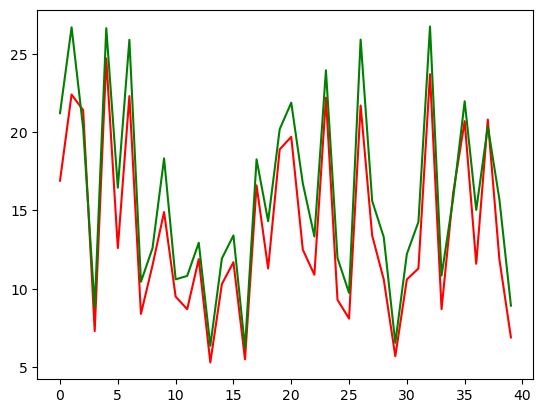

In [71]:
plt.figure()
plt.plot(y_test, color="r")
plt.plot(tahmin1 ,color="g")

In [72]:
residuals1=y_test-tahmin1

<Axes: ylabel='Count'>

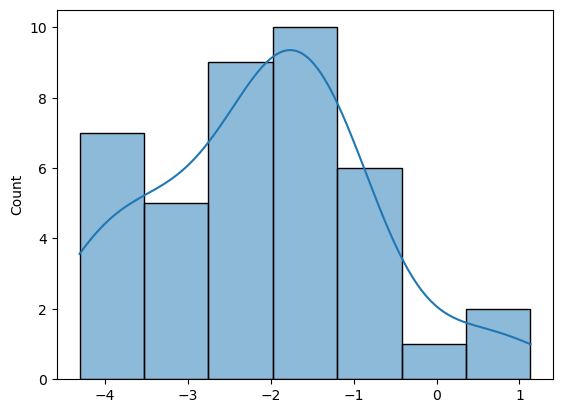

In [73]:
sns.histplot(residuals1,kde=True)

<Axes: ylabel='Density'>

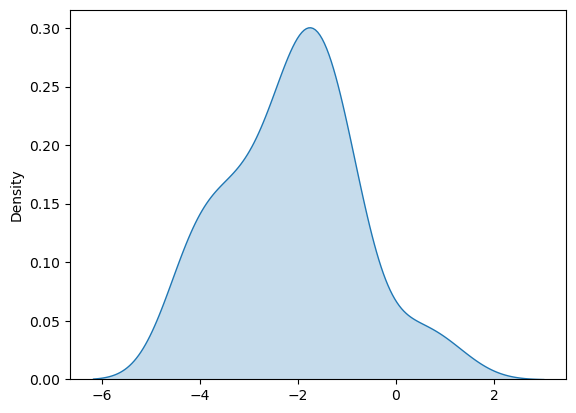

In [74]:
sns.kdeplot(residuals1, fill=True)

#### Radio yu arttırıyoruz

In [76]:
x_test=depo

In [77]:
x_test["Radio"]=x_test["Radio"]*2

In [78]:
tahmin2=GBR.predict(x_test)

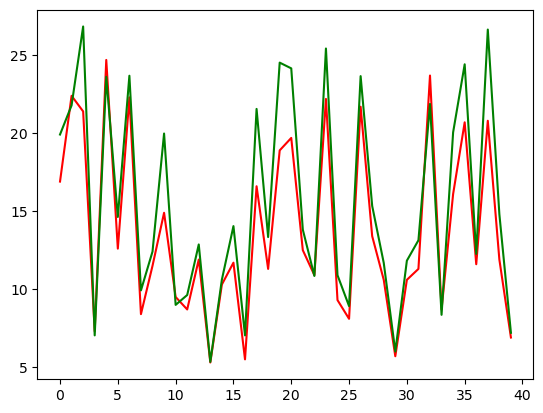

In [79]:
plt.figure()
plt.plot(y_test, color="r")
plt.plot(tahmin2 ,color="g")

In [80]:
residuals2=y_test-tahmin2

<Axes: ylabel='Count'>

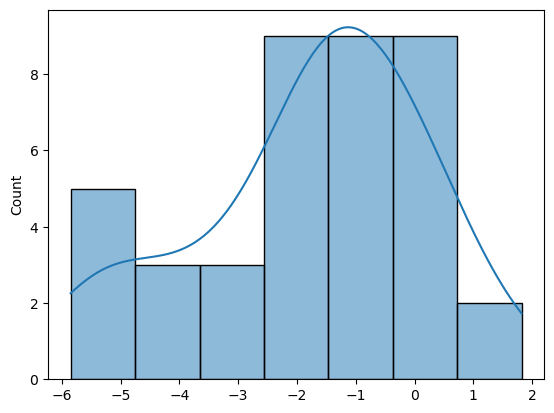

In [81]:
sns.histplot(residuals2,kde=True)

<Axes: ylabel='Density'>

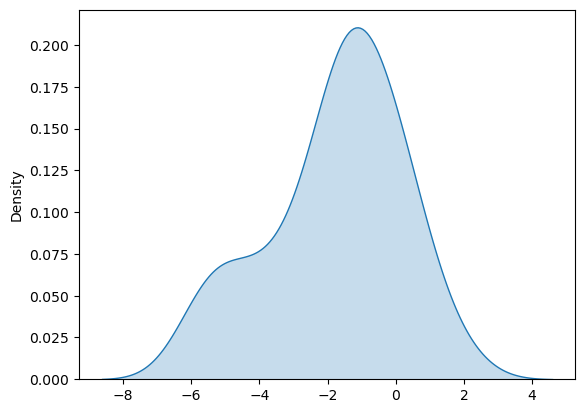

In [82]:
sns.kdeplot(residuals2, fill=True)

#### Newspaper i arttırıyoruz

In [84]:
x_test=depo

In [85]:
x_test["Newspaper"]=x_test["Newspaper"]*2

In [86]:
tahmin3=GBR.predict(x_test)

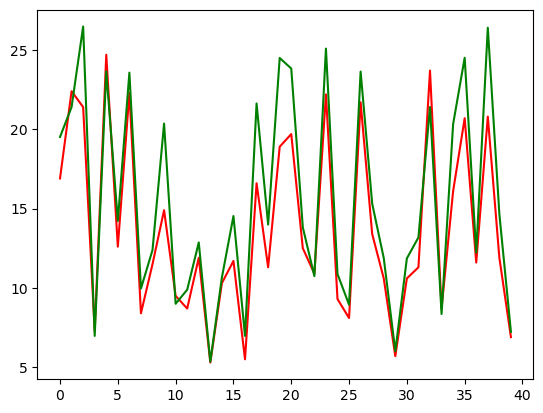

In [87]:
plt.figure()
plt.plot(y_test, color="r")
plt.plot(tahmin3 ,color="g")

In [88]:
residuals3=y_test-tahmin3

<Axes: ylabel='Count'>

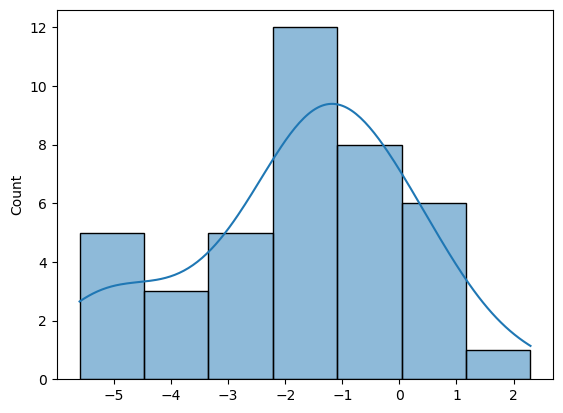

In [89]:
sns.histplot(residuals3,kde=True)

<Axes: ylabel='Density'>

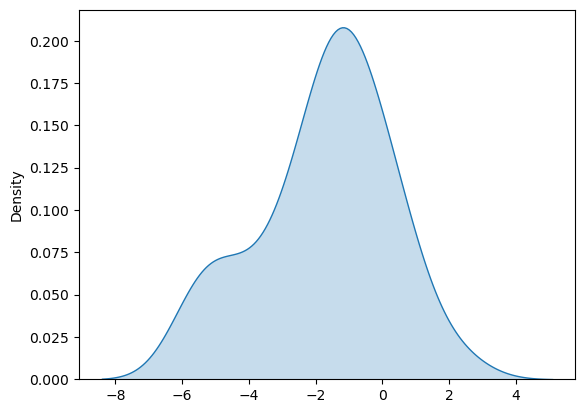

In [90]:
sns.kdeplot(residuals3, fill=True)

#### Sonuç

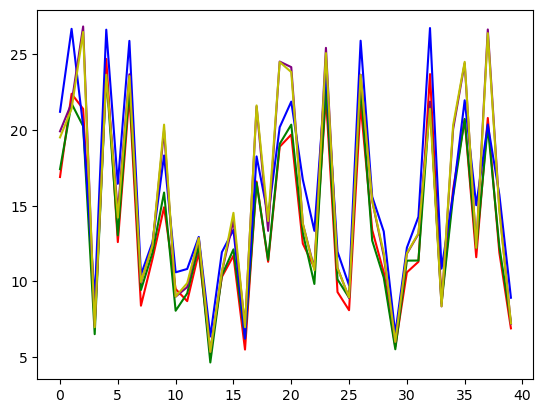

In [91]:
plt.figure()
plt.plot(y_test, color="r")
plt.plot(tahmin0 ,color="g")
plt.plot(tahmin1,color="b")
plt.plot(tahmin2 ,color="purple")
plt.plot(tahmin3 ,color="y")

In [241]:
d=y_test.mean()
d0=tahmin0.mean()
d1=tahmin1.mean()
d2=tahmin2.mean()
d3=tahmin3.mean()

In [243]:
deger=d,d0,d1,d2,d3

In [245]:
deger

(13.7125,
 13.773180328022452,
 15.8306562683724,
 15.47871719287852,
 15.455268313184707)

<BarContainer object of 5 artists>

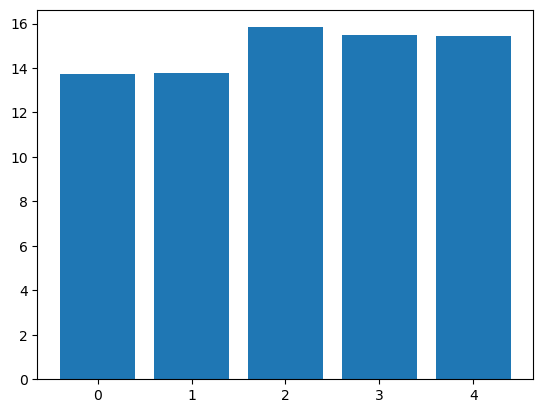

In [263]:
x = np.arange(len(deger))
plt.bar(x, deger)